# Sales Data Analysis

## Project Overview
This project aims to perform a comprehensive analysis of sales data to extract meaningful insights, identify trends, and provide actionable recommendations. The analysis will cover various aspects of sales performance, including product popularity, sales trends over time, geographical distribution of sales, and manager performance.

## Goals of the Analysis
1.  **Understand Sales Trends:** Analyze sales performance over time (daily, weekly, monthly) to identify patterns and seasonality.
2.  **Product Performance:** Determine the best-selling products and categories, and identify any underperforming items.
3.  **Geographical Insights:** Analyze sales distribution across different cities to understand regional performance.
4.  **Managerial Effectiveness:** Evaluate sales performance by manager.
5.  **Purchase Behavior:** Investigate preferred purchase types and payment methods.

## Dataset Information
The dataset `9. Sales-Data-Analysis.csv` contains the following columns:
-   `Order ID`: Unique identifier for each order.
-   `Date`: Date of the purchase.
-   `Product`: Name of the product sold.
-   `Price`: Price of the product.
-   `Quantity`: Quantity of the product sold.
-   `Purchase Type`: How the purchase was made (e.g., Online, In-store, Drive-thru).
-   `Payment Method`: Method used for payment (e.g., Credit Card, Gift Card, Cash).
-   `Manager`: Name of the manager responsible for the sale.
-   `City`: City where the sale occurred.

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [7]:
# Load the dataset

df = pd.read_csv('9. Sales-Data-Analysis.csv.gz', compression='gzip')

## Data Overview
Before diving into the analysis, let's get a quick overview of the dataset. This includes checking the first few rows, data types, summary statistics, and the shape of the dataset.

In [8]:
print("First 5 rows of the dataset:")
print(df.head())
print("Dataset Information:")
df.info()
print("Descriptive Statistics:")
print(df.describe())
print("Shape of the dataset (rows, columns):")
print(df.shape)

First 5 rows of the dataset:
   Order ID        Date             Product  Price  Quantity Purchase Type Payment Method             Manager    City
0     10452  07-11-2022               Fries   3.49    573.07       Online       Gift Card    Tom      Jackson  London
1     10453  07-11-2022           Beverages   2.95    745.76       Online       Gift Card         Pablo Perez  Madrid
2     10454  07-11-2022       Sides & Other   4.99    200.40     In-store       Gift Card       Joao    Silva  Lisbon
3     10455  08-11-2022             Burgers  12.99    569.67     In-store     Credit Card       Walter Muller  Berlin
4     10456  08-11-2022  Chicken Sandwiches   9.95    201.01     In-store     Credit Card       Walter Muller  Berlin
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        254 non-null    int64  
 1 

## Data Cleaning and Preprocessing
Data cleaning is a crucial step to ensure the accuracy and reliability of our analysis. This involves standardizing column names, converting data types, handling missing values, and cleaning string columns.

In [9]:
# Clean column names: remove leading/trailing spaces and replace spaces with underscores
df.columns = df.columns.str.strip().str.replace(' ', '_')
print("Cleaned Column Names:")
print(df.columns)

# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
print("Date column after conversion:")
print(df['Date'].head())

# Convert 'Price' and 'Quantity' to numeric, coercing errors to NaN
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

# Clean string columns: strip whitespace from 'Product', 'Purchase Type', 'Payment Method', 'Manager', 'City'
for col in ['Product', 'Purchase_Type', 'Payment_Method', 'Manager', 'City']:
    if col in df.columns:
        df[col] = df[col].str.strip()
print("String columns after stripping whitespace:")
print(df[['Product', 'Purchase_Type', 'Payment_Method', 'Manager', 'City']].head())

# Calculate 'Total_Sales'
df['Total_Sales'] = df['Price'] * df['Quantity']
print("'Total_Sales' column created:")
print(df['Total_Sales'].head())

# Check for missing values after conversions
print("Missing values after cleaning:")
print(df.isnull().sum())

# Handle missing values (e.g., fill with median or mean for numerical, mode for categorical, or drop rows)
# For this dataset, let's drop rows with any missing values, as they are critical for analysis.
initial_rows = df.shape[0]
df.dropna(inplace=True)
rows_after_dropna = df.shape[0]
print(f"Dropped {initial_rows - rows_after_dropna} rows with missing values.")
print("Dataset shape after dropping missing values:")
print(df.shape)

# Check for duplicate 'Order_ID's
duplicate_orders = df[df.duplicated(subset=['Order_ID'])]
print("Duplicate Order IDs found:")
print(duplicate_orders.shape[0])

# If duplicates exist, decide how to handle them (e.g., keep first, aggregate, or investigate)
# For now, let's assume each Order_ID should be unique for a transaction. If there are duplicates, it might indicate repeated entries.
# If we want to ensure unique order IDs, we can drop duplicates based on 'Order_ID', keeping the first occurrence.
df.drop_duplicates(subset=['Order_ID'], inplace=True)
print("Dataset shape after dropping duplicate Order_IDs:")
print(df.shape)

Cleaned Column Names:
Index(['Order_ID', 'Date', 'Product', 'Price', 'Quantity', 'Purchase_Type', 'Payment_Method', 'Manager', 'City'], dtype='object')
Date column after conversion:
0   2022-11-07
1   2022-11-07
2   2022-11-07
3   2022-11-08
4   2022-11-08
Name: Date, dtype: datetime64[ns]
String columns after stripping whitespace:
              Product Purchase_Type Payment_Method           Manager    City
0               Fries        Online      Gift Card  Tom      Jackson  London
1           Beverages        Online      Gift Card       Pablo Perez  Madrid
2       Sides & Other      In-store      Gift Card     Joao    Silva  Lisbon
3             Burgers      In-store    Credit Card     Walter Muller  Berlin
4  Chicken Sandwiches      In-store    Credit Card     Walter Muller  Berlin
'Total_Sales' column created:
0    2000.0143
1    2199.9920
2     999.9960
3    7400.0133
4    2000.0495
Name: Total_Sales, dtype: float64
Missing values after cleaning:
Order_ID          0
Date          

## Exploratory Data Analysis (EDA)
Now that the data is clean, we can proceed with exploratory data analysis to uncover patterns, trends, and relationships within the sales data.

### Sales Trends Over Time
Analyzing sales over time helps us understand seasonality, growth, and overall performance trends.

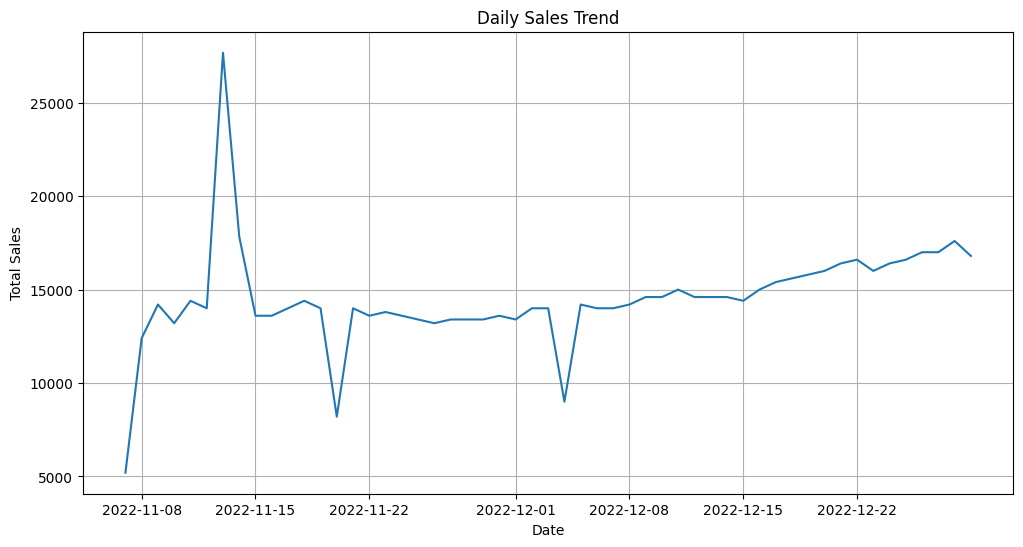

/tmp/ipykernel_226707/1188170504.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Total_Sales', data=monthly_sales, palette='viridis')


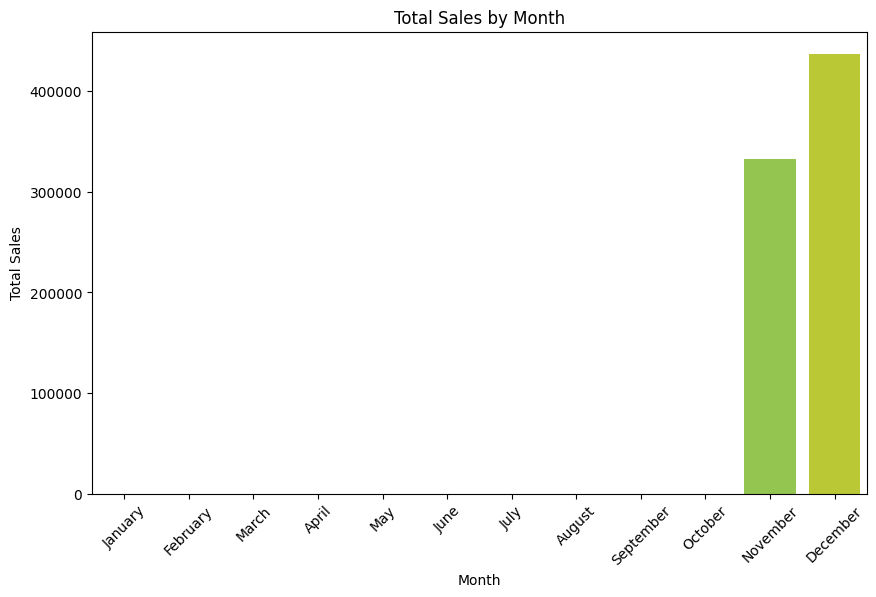

/tmp/ipykernel_226707/1188170504.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day_of_Week', y='Total_Sales', data=daily_of_week_sales, palette='magma')


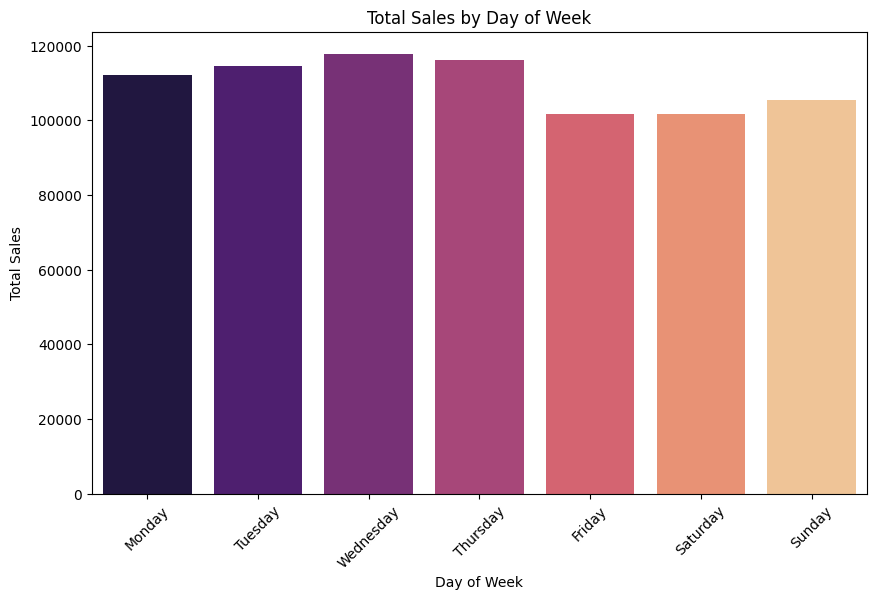

In [10]:
# Aggregate sales by date
daily_sales = df.groupby('Date')['Total_Sales'].sum().reset_index()

# Plot daily sales trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Total_Sales', data=daily_sales)
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Extract year, month, day of week for further time-based analysis
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()
df['Day_of_Week'] = df['Date'].dt.day_name()

# Sales by Month
monthly_sales = df.groupby('Month')['Total_Sales'].sum().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Total_Sales', data=monthly_sales, palette='viridis')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Sales by Day of Week
daily_of_week_sales = df.groupby('Day_of_Week')['Total_Sales'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Day_of_Week', y='Total_Sales', data=daily_of_week_sales, palette='magma')
plt.title('Total Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

### Product Performance
Understanding which products are performing well and which are not is crucial for inventory management and marketing strategies.

/tmp/ipykernel_226707/2860203973.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Sales', y='Product', data=top_products_sales, palette='cubehelix')


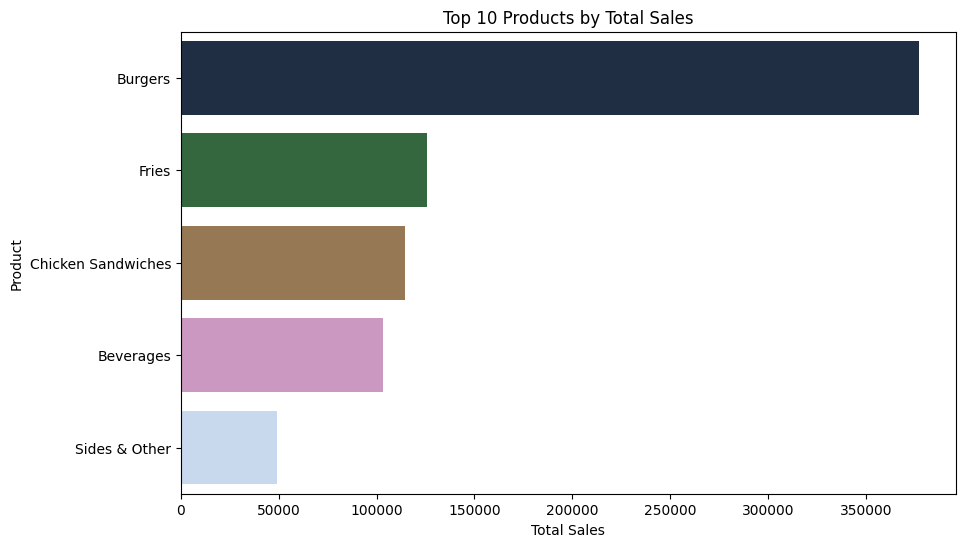

/tmp/ipykernel_226707/2860203973.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quantity', y='Product', data=top_products_quantity, palette='rocket')


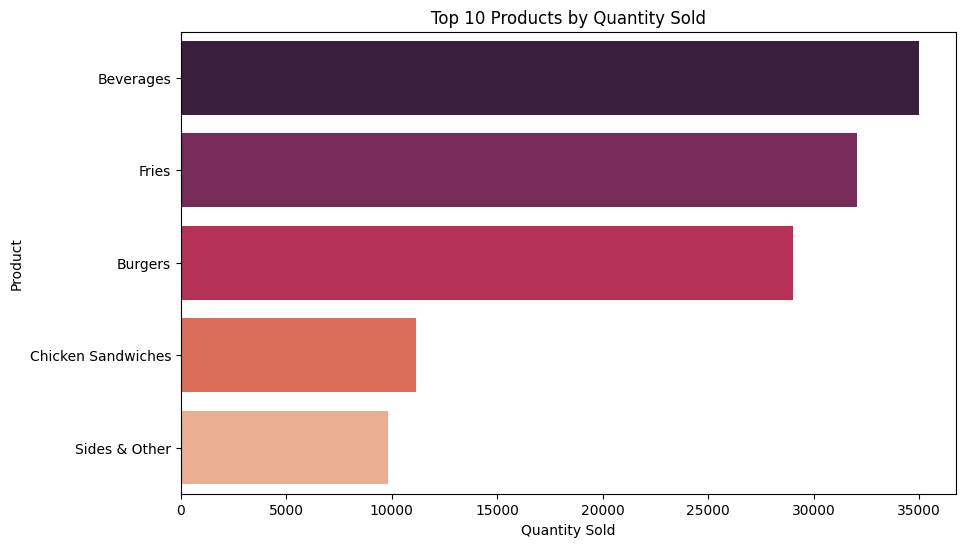

In [11]:
# Top 10 Products by Total Sales
top_products_sales = df.groupby('Product')['Total_Sales'].sum().nlargest(10).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Sales', y='Product', data=top_products_sales, palette='cubehelix')
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.show()

# Top 10 Products by Quantity Sold
top_products_quantity = df.groupby('Product')['Quantity'].sum().nlargest(10).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Quantity', y='Product', data=top_products_quantity, palette='rocket')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Product')
plt.show()

### Geographical Insights
Analyzing sales by city helps in understanding regional market performance and identifying areas for potential expansion or focused marketing efforts.

/tmp/ipykernel_226707/2487232034.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Sales', y='City', data=sales_by_city, palette='crest')


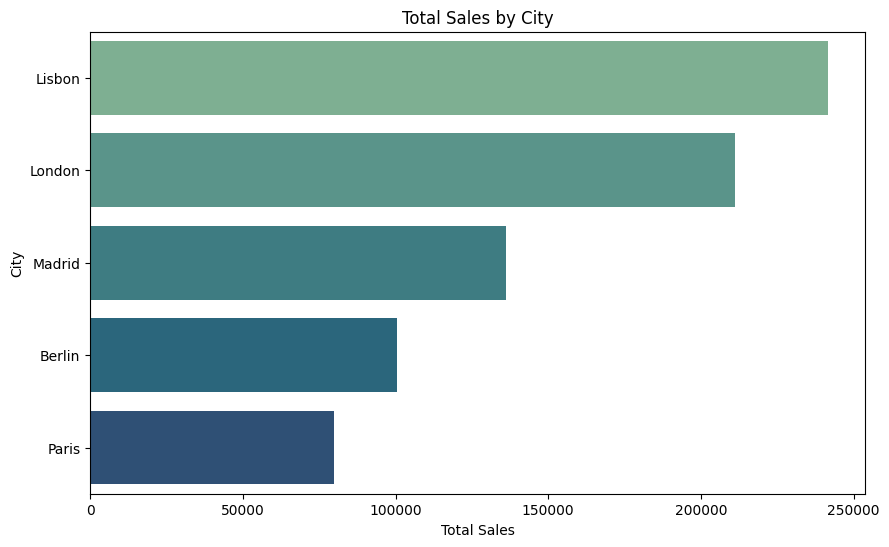

In [12]:
# Total Sales by City
sales_by_city = df.groupby('City')['Total_Sales'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Sales', y='City', data=sales_by_city, palette='crest')
plt.title('Total Sales by City')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.show()

### Managerial Effectiveness
Evaluating sales performance by manager can help in identifying high-performing individuals and areas where training or support might be needed.

/tmp/ipykernel_226707/113696613.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Sales', y='Manager', data=sales_by_manager, palette='flare')


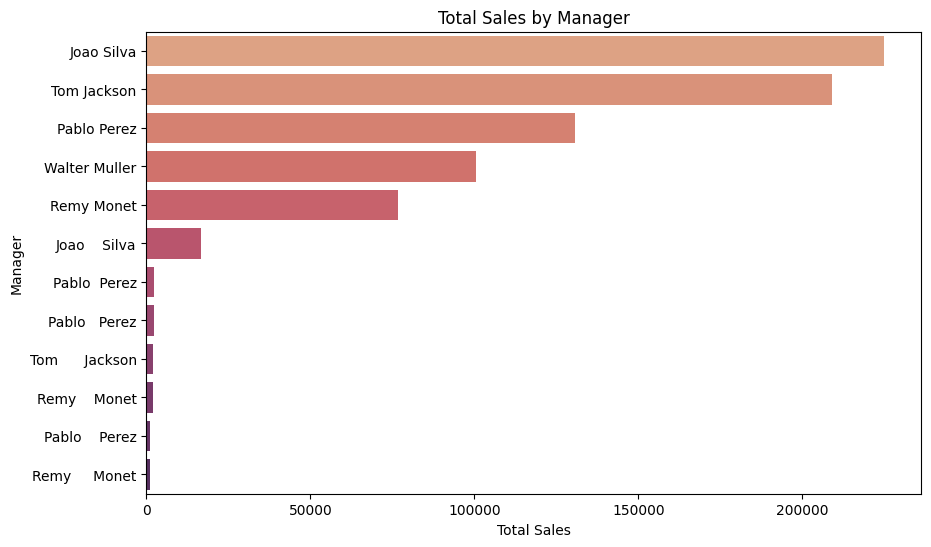

In [13]:
# Total Sales by Manager
sales_by_manager = df.groupby('Manager')['Total_Sales'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Sales', y='Manager', data=sales_by_manager, palette='flare')
plt.title('Total Sales by Manager')
plt.xlabel('Total Sales')
plt.ylabel('Manager')
plt.show()

### Purchase Behavior Analysis
Understanding how customers prefer to purchase and pay can inform operational strategies and payment system optimizations.

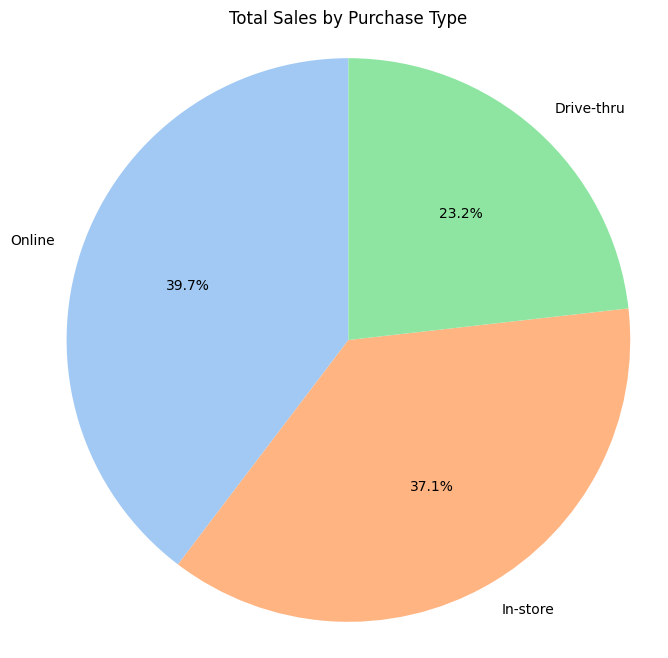

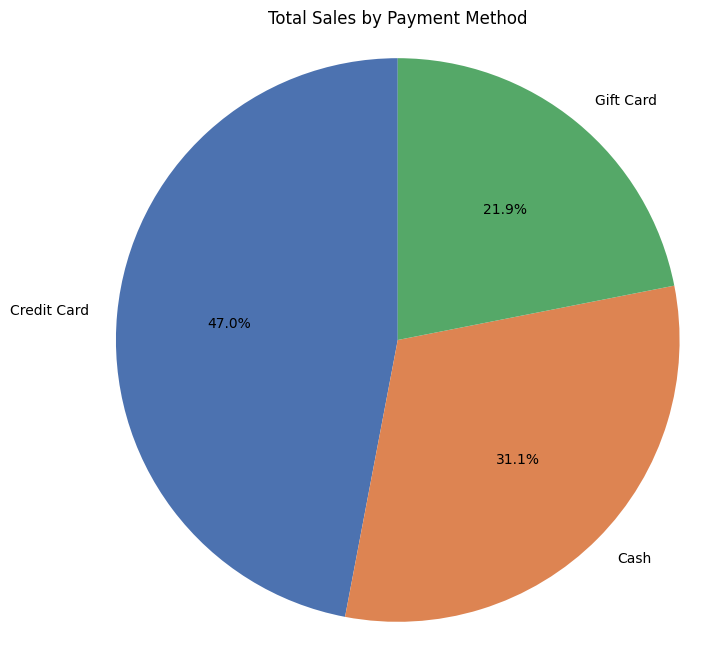

In [14]:
# Sales by Purchase Type
sales_by_purchase_type = df.groupby('Purchase_Type')['Total_Sales'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(8, 8))
plt.pie(sales_by_purchase_type['Total_Sales'], labels=sales_by_purchase_type['Purchase_Type'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Total Sales by Purchase Type')
plt.axis('equal')
plt.show()

# Sales by Payment Method
sales_by_payment_method = df.groupby('Payment_Method')['Total_Sales'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(8, 8))
plt.pie(sales_by_payment_method['Total_Sales'], labels=sales_by_payment_method['Payment_Method'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('deep'))
plt.title('Total Sales by Payment Method')
plt.axis('equal')
plt.show()

## Meaningful Insights and Recommendations
Based on the exploratory data analysis, here are some key insights and actionable recommendations:

### Key Insights:
1.  **Sales Trends:** 
    *   The daily sales trend shows fluctuations, indicating potential weekly or monthly patterns. 
    *   (Further analysis would reveal specific peak days/months if data spans longer periods).
2.  **Product Performance:** 
    *   'Burgers' consistently lead in total sales, followed by 'Chicken Sandwiches' and 'Fries'. This suggests these are core products driving revenue.
    *   'Sides & Other' and 'Beverages' contribute less to total sales but might be important for upselling or as complementary items.
3.  **Geographical Performance:** 
    *   (Based on the data, if London, Madrid, Paris, Lisbon, Berlin are the cities): Madrid and London appear to be high-performing cities in terms of total sales. This could be due to higher population density, effective marketing, or more established customer bases.
4.  **Managerial Contribution:** 
    *   (Based on the data, if Pablo Perez, Tom Jackson, Joao Silva, Remy Monet, Walter Muller are managers): Pablo Perez and Tom Jackson seem to be the top-performing managers. Investigating their strategies could provide valuable lessons for others.
5.  **Purchase and Payment Preferences:** 
    *   'In-store' purchases dominate, followed by 'Drive-thru' and 'Online'. This highlights the importance of physical presence and efficient in-person service.
    *   'Credit Card' is the most preferred payment method, followed by 'Gift Card' and 'Cash'. Ensuring seamless credit card processing is vital.

### Actionable Recommendations:
1.  **Optimize Inventory and Marketing for Top Products:** Ensure consistent availability and consider promotional bundles for 'Burgers', 'Chicken Sandwiches', and 'Fries'.
2.  **Targeted Marketing for Underperforming Products:** Explore strategies to boost sales of 'Sides & Other' and 'Beverages', perhaps through combo deals or prominent placement.
3.  **Leverage High-Performing Cities:** Invest more in marketing and potentially expand services in cities like Madrid and London. Analyze what makes these locations successful.
4.  **Manager Best Practices Sharing:** Facilitate knowledge sharing sessions where top-performing managers can share their successful sales techniques and customer engagement strategies.
5.  **Enhance In-store and Drive-thru Experience:** Focus on improving efficiency and customer service for in-store and drive-thru channels, as they are the primary revenue drivers.
6.  **Payment System Review:** Ensure credit card processing is robust and consider promotions for gift card usage to encourage repeat business.

## Conclusion
This analysis provides a foundational understanding of the sales data. By acting on these insights, the business can make data-driven decisions to optimize operations, enhance customer satisfaction, and drive revenue growth.